In [3]:
from qcodes.instrument_drivers.stanford_research.SR830 import SR830
from qcodes.instrument_drivers.Keithley.Keithley_2400 import Keithley2400


import numpy as np
import qcodes as qc
import pandas
import matplotlib.pyplot as plt
import time

## Multidimensional scanning module
from qcodes.dataset import (
    LinSweep,
    Measurement,
    dond,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
    plot_dataset,
)

## Using interactive widget
from qcodes.interactive_widget import experiments_widget

import pandas as pd
from scipy.optimize import curve_fit

initialise_or_create_database_at("Thesis_PV.db")
def loader(id):
    data = load_by_run_spec(experiment_name = "Short Testing", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df



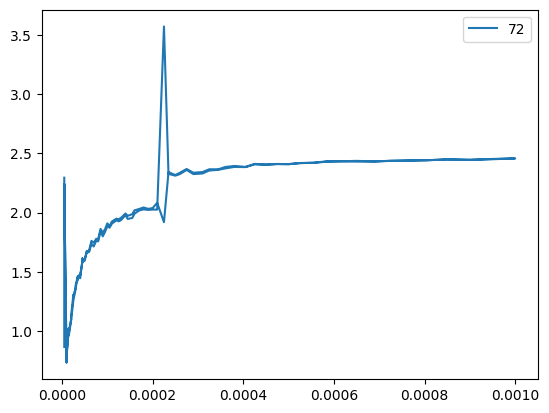

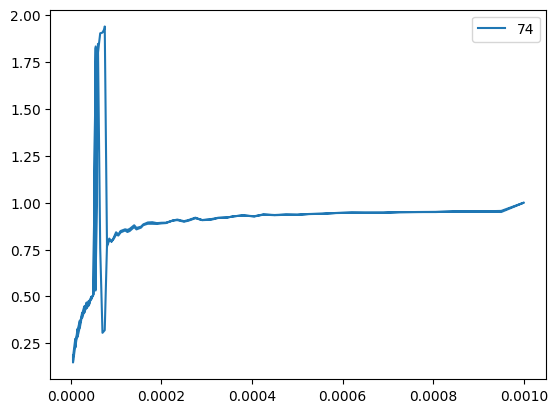

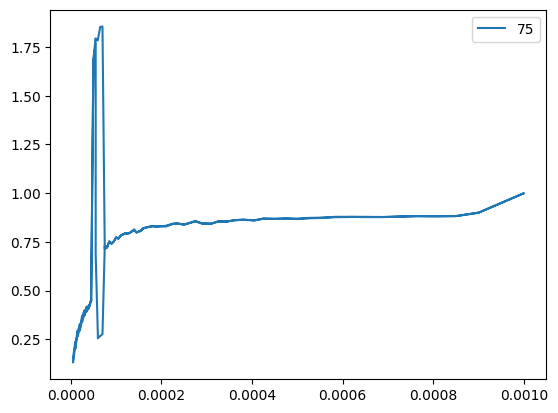

In [2]:
for i in [72, 74, 75]:
    df = loader(i)
    plt.plot(df['smu_volt'], df['smu_volt']/df['smu_curr'], label = i)
    plt.legend()
    plt.show()
#plt.ylim(0, 5)

#plt.show()
#plt.scatter(df['curr_time'][:5], df['smu_volt'][:5])

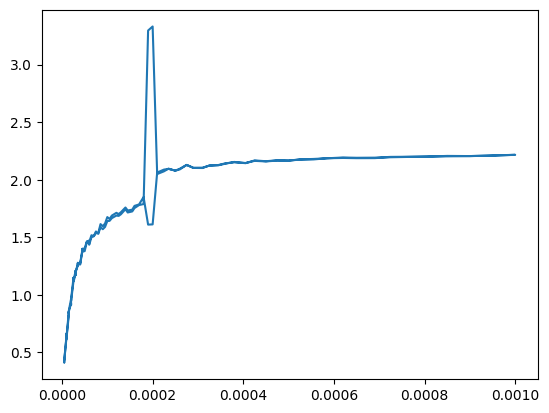

In [3]:
df = loader(66)
plt.plot(df['smu_volt'], df['smu_volt']/df['smu_curr'], label = 64)

In [4]:
df['smu_volt']

0      0.000005
1      0.000005
2      0.000005
3      0.000005
4      0.000005
         ...   
195    0.000005
196    0.000005
197    0.000005
198    0.000005
199    0.000005
Name: smu_volt, Length: 200, dtype: float64

In [5]:
df['smu_volt'][2]

5e-06

In [8]:
def thermistor_res_to_temp(res):
    A = 3.9083*10**-3
    R0 = 100
    temp = (res/R0 - 1)/A + 273.15
    return temp
   
def thermistor_temp_to_res(t):
    t = t-273.15
    A = 3.9083e-3
    B = -5.775e-7 
    C = -4.183e-12
    R0 = 100
    R = R0*(1+A*t+B*t**2+C*(t-100)*t**3)
    return R

In [9]:
time.time()-max(df['curr_time'])

2932279.925091982

Text(0, 0.5, 'Temperature (K)')

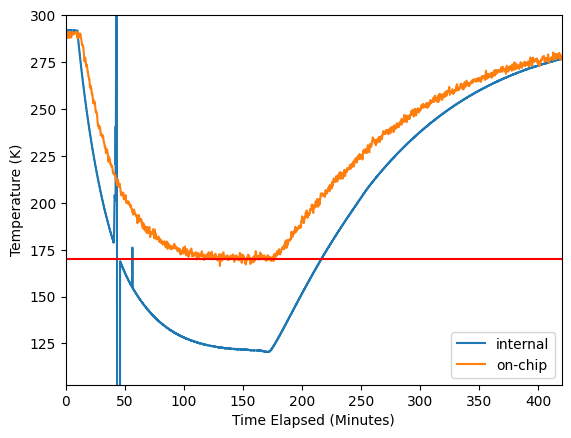

In [10]:
def loader2(id):
    data = load_by_run_spec(experiment_name = "Temperature Testing", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df
from scipy.ndimage import gaussian_filter1d
df = loader2(78)
df['i'] = df['lia1_amplitude']/10**6
df['therm_temp'] = thermistor_res_to_temp(df['lia1_X']/df['i'])
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, gaussian_filter1d(df['therm_temp'], sigma = 20), label = 'on-chip')

#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['therm_temp'], label = 'on-chip')
plt.ylim(103, 300)
plt.xlim(0, 420)
#plt.xlim(0, 50)
#plt.ylim(275, 300)
plt.hlines(xmin=0, xmax =  1e11, y = 170, color = 'r')
plt.legend()
plt.xlabel("Time Elapsed (Minutes)")
plt.ylabel("Temperature (K)")

In [11]:
df['curr_time'][1]-df['curr_time'][0]

0.4978799819946289

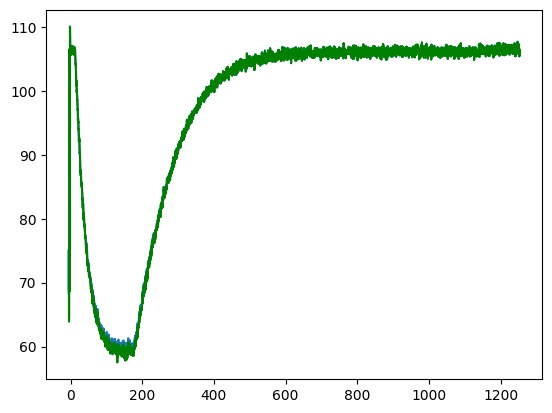

In [12]:
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, gaussian_filter1d(df['lia1_X']/df['i'], sigma = 20), label = 'on-chip')
df['therm_res'] = thermistor_temp_to_res(gaussian_filter1d(df['therm_temp'], sigma = 20))
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['therm_res'], color = 'g')
#plt.ylim(105, 110)
#plt.xlim(0, 50)

Text(0, 0.5, 'Temperature (K)')

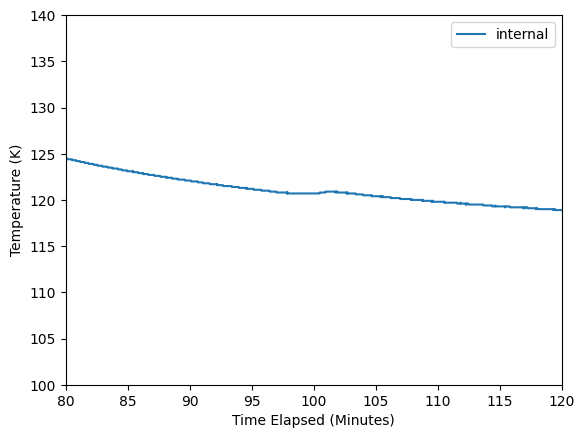

In [13]:
df = loader2(79)
df['i'] = df['lia1_amplitude']/10**6
df['therm_temp'] = thermistor_res_to_temp(df['lia1_X']/df['i'])
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, gaussian_filter1d(df['therm_temp'], sigma = 20), label = 'on-chip')

#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['therm_temp'], label = 'on-chip')
#plt.ylim(103, 300)
#plt.xlim(0, 420)
#plt.xlim(0, 50)
#plt.ylim(275, 300)
#plt.hlines(xmin=0, xmax =  1e11, y = 170, color = 'r')
plt.legend()
plt.xlim(80, 120)
plt.ylim(100, 140)
plt.xlabel("Time Elapsed (Minutes)")
plt.ylabel("Temperature (K)")

In [14]:
from scipy.optimize import curve_fit
def decay_exp(x, a, b, c):
    return a+be**(cx)

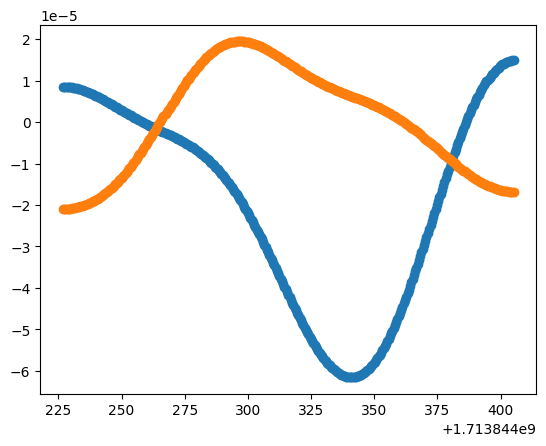

In [15]:
df = loader2(99)
plt.scatter(df['curr_time'], gaussian_filter1d(df['lia1_X'], 50))
plt.scatter(df['curr_time'], gaussian_filter1d(df['lia1_Y'], 50))

In [16]:
df

,curr_time,lia1_R,lia1_X,lia1_Y,lia1_amplitude,lia1_phase,lia1_sensitivity,temp
0,1.713844e+09,0.000021,-0.000018,0.000011,0.1,150.060,0.0005,118.0
1,1.713844e+09,0.000129,-0.000006,0.000129,0.1,92.586,0.0005,118.0
2,1.713844e+09,0.000203,0.000017,0.000202,0.1,85.146,0.0005,118.0
3,1.713844e+09,0.000198,0.000028,0.000196,0.1,81.840,0.0005,118.0
4,1.713844e+09,0.000199,0.000095,0.000175,0.1,61.518,0.0005,118.0
...,...,...,...,...,...,...,...,...
352,1.713844e+09,0.000170,0.000154,-0.000072,0.1,-24.936,0.0005,117.7
353,1.713844e+09,0.000274,0.000122,-0.000245,0.1,-63.546,0.0005,117.7
354,1.713844e+09,0.000227,-0.000091,-0.000208,0.1,-113.706,0.0005,117.7
355,1.713844e+09,0.000213,-0.000210,-0.000033,0.1,-170.970,0.0005,117.7


2.681877565751634e-06 1.7169493584313726e-06


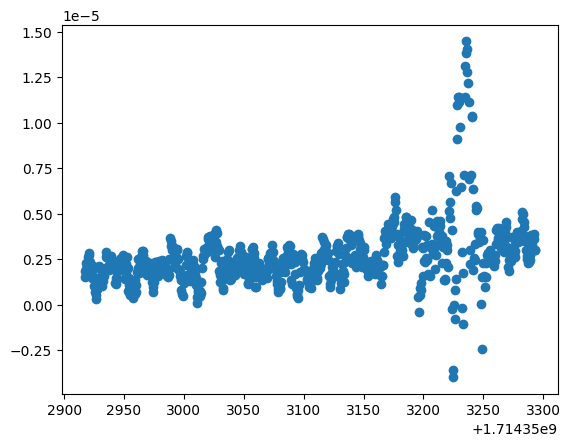

In [17]:
df = loader2(113) # chopper sppinning, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

-0.0032032837050359714 -0.004362595971223021


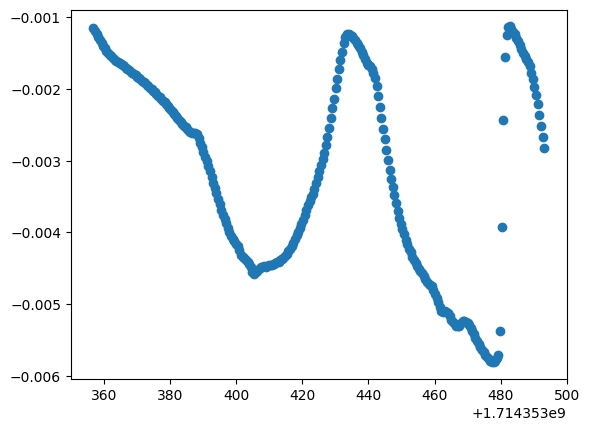

In [18]:
df = loader2(116) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

-2.4267670500000006e-07 -7.054690592105263e-08


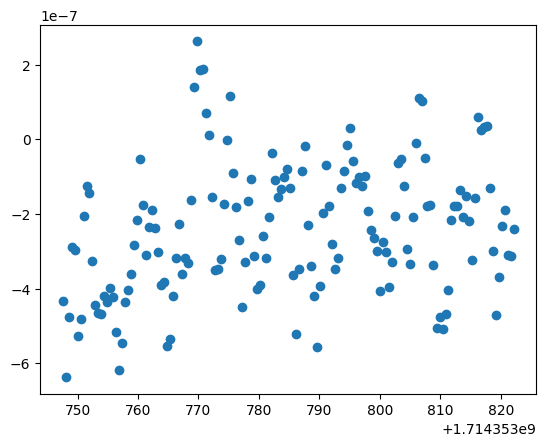

In [19]:
df = loader2(118) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

In [20]:
df = loader2(121) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

NameError: No run matching the supplied information found.

In [ ]:
def loader(id):
    data = load_by_run_spec(experiment_name = "Polarization Dependence", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df

In [ ]:
df = loader(122) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['temp'])
#print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

In [ ]:
df

In [ ]:
load_R = 10**6
df['i'] = df['lia1_amplitude']/load_R
df['sample_res'] = df['lia1_X']/df['i']
df

In [ ]:
df = loader(122) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['temp'])
#print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))
plt.show()

load_R = 10**6
df['i'] = df['lia1_amplitude']/load_R
df['sample_res'] = df['lia1_X']/df['i']


plt.scatter(df['curr_time'], df['sample_res'])
plt.show()
plt.scatter(df['temp'], df['sample_res'])

In [21]:
for i in [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]:
    df = loader(i)
    plt.plot(df['curr_time'], df['lia1_X'])
    plt.plot(df['curr_time'], df['lia1_Y'])
    plt.show()

NameError: No run matching the supplied information found.

In [10]:
# initialise_or_create_database_at("Thesis_PV.db")
def loader(id):
    data = load_by_run_spec(experiment_name = "Polarization Dependence", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df

In [4]:
def sample_variance(data):
    meanD = np.mean(data)
    varD = 0
    for i in range(len(data)):
        varD += (data[i]-meanD)**2
    s2 = 1/(len(data)-1)*varD
    return s2

def SEM(data):
    s = np.sqrt(sample_variance(data))
    return s/np.sqrt(len(data))

In [5]:
SEM([98,98, 99])

0.3333333333333333

In [57]:
df_dict_1 = {'off': loader(124),
            0: loader(125),
            10: loader(126),
            20: loader(127),
            30: loader(128),
            40: loader(129),
            50: loader(130),
            60: loader(131),
            70: loader(133),
            80: loader(134),
            'off2': loader(135)}

df_dict_2 = {'off': loader(136),
            0: loader(138),
            10: loader(139),
             20: loader(140),
             30: loader(141),
             40: loader(142)

            }

<ErrorbarContainer object of 3 artists>

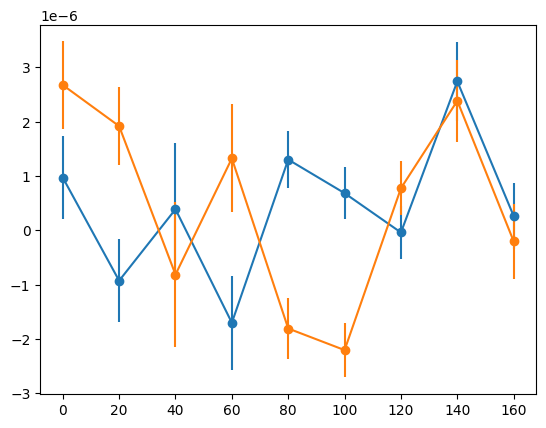

In [54]:
X_mean_arr = []
Y_mean_arr = []
X_sem_arr = []
Y_sem_arr = []
contact_arr = np.linspace(0, 160, 9)
for contact in df_dict_1.keys():
    if type(contact) != str:
        df = df_dict_1[contact]
        X_mean = np.mean(df['lia1_X'])
        Y_mean = np.mean(df['lia1_Y'])
        X_sem = SEM(df['lia1_X'])
        Y_sem = SEM(df['lia1_Y'])
        X_mean_arr += [X_mean]
        Y_mean_arr += [Y_mean]
        X_sem_arr += [X_sem]
        Y_sem_arr += [Y_sem]

        
off_df = pd.concat([df_dict_1['off'], df_dict_1['off2']], ignore_index= True)
x_off_mean = np.mean(off_df['lia1_X'])
x_off_sem = SEM(off_df['lia1_X'])

y_off_mean = np.mean(off_df['lia1_Y'])
y_off_sem = SEM(off_df['lia1_Y'])

X_mean_arr_adj = [i-x_off_mean for i in X_mean_arr]
Y_mean_arr_adj = [i-y_off_mean for i in Y_mean_arr]

X_sem_arr_adj = [np.sqrt(i**2 + x_off_sem**2) for i in X_sem_arr]
Y_sem_arr_adj = [np.sqrt(i**2 + y_off_sem**2) for i in Y_sem_arr]

plt.errorbar(contact_arr, X_mean_arr_adj, yerr = X_sem_arr_adj, fmt = "o-")
plt.errorbar(contact_arr, Y_mean_arr_adj, yerr = Y_sem_arr_adj, fmt = "o-")


#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

#off_df = df_dict_1['off2']
#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#}plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))
        

In [ ]:
X_mean_arr = []
Y_mean_arr = []
X_sem_arr = []
Y_sem_arr = []
contact_arr = np.linspace(0, 160, 9)
for contact in df_dict_1.keys():
    if type(contact) != str:
        df = df_dict_1[contact]
        X_mean = np.mean(df['lia1_X'])
        Y_mean = np.mean(df['lia1_Y'])
        X_sem = SEM(df['lia1_X'])
        Y_sem = SEM(df['lia1_Y'])
        X_mean_arr += [X_mean]
        Y_mean_arr += [Y_mean]
        X_sem_arr += [X_sem]
        Y_sem_arr += [Y_sem]

        
off_df = pd.concat([df_dict_1['off'], df_dict_1['off2']], ignore_index= True)
x_off_mean = np.mean(off_df['lia1_X'])
x_off_sem = SEM(off_df['lia1_X'])

y_off_mean = np.mean(off_df['lia1_Y'])
y_off_sem = SEM(off_df['lia1_Y'])

X_mean_arr_adj = [i-x_off_mean for i in X_mean_arr]
Y_mean_arr_adj = [i-y_off_mean for i in Y_mean_arr]

X_sem_arr_adj = [np.sqrt(i**2 + x_off_sem**2) for i in X_sem_arr]
Y_sem_arr_adj = [np.sqrt(i**2 + y_off_sem**2) for i in Y_sem_arr]

plt.errorbar(contact_arr, X_mean_arr_adj, yerr = X_sem_arr_adj, fmt = "o-")
plt.errorbar(contact_arr, Y_mean_arr_adj, yerr = Y_sem_arr_adj, fmt = "o-")


#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

#off_df = df_dict_1['off2']
#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

<ErrorbarContainer object of 3 artists>

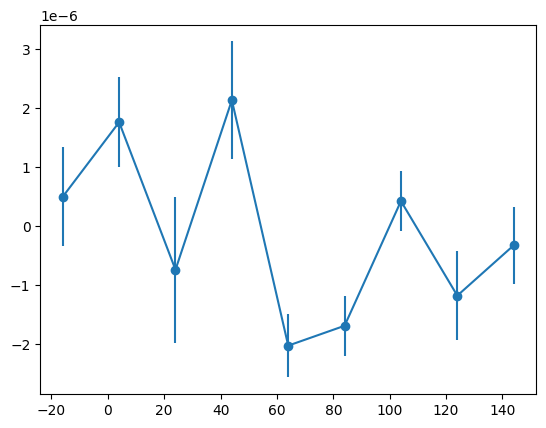

In [56]:
X_mean_arr = []
X_sem_arr = []

contact_arr = np.linspace(0, 160, 9)
contact_arr = [i - 16 for i in contact_arr]
for contact in df_dict_1.keys():
    if type(contact) != str:
        df = df_dict_1[contact]
        df['lia1_in_phase'] = df['lia1_X']*-np.sqrt(3)/2 + df['lia1_Y']*1/2
        X_mean = np.mean(df['lia1_in_phase'])
        X_sem = SEM(df['lia1_in_phase'])
        X_mean_arr += [X_mean]
        X_sem_arr += [X_sem]

        
off_df = pd.concat([df_dict_1['off'], df_dict_1['off2']], ignore_index= True)
off_df['lia1_in_phase'] = off_df['lia1_X']*-np.sqrt(3)/2 + off_df['lia1_Y']*1/2

x_off_mean = np.mean(off_df['lia1_in_phase'])
x_off_sem = SEM(off_df['lia1_in_phase'])


X_mean_arr_adj = [i-x_off_mean for i in X_mean_arr]
X_sem_arr_adj = [np.sqrt(i**2 + x_off_sem**2) for i in X_sem_arr]


plt.errorbar(contact_arr, X_mean_arr_adj, yerr = X_sem_arr_adj, fmt = "o-")



#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

#off_df = df_dict_1['off2']
#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

<ErrorbarContainer object of 3 artists>

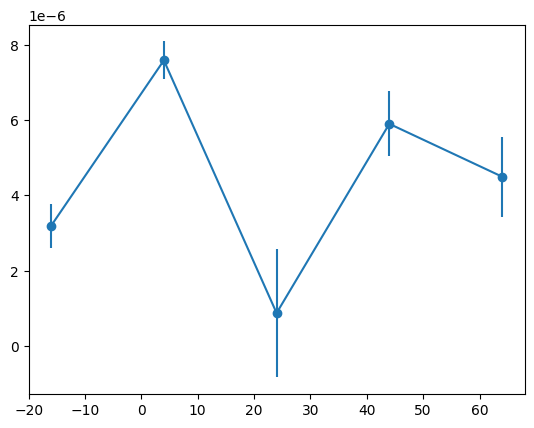

In [60]:
X_mean_arr = []
X_sem_arr = []

contact_arr = np.linspace(0, 80, 5)
contact_arr = [i - 16 for i in contact_arr]
for contact in df_dict_2.keys():
    if type(contact) != str:
        df = df_dict_2[contact]
        df['lia1_in_phase'] = df['lia1_X']*-np.sqrt(3)/2 + df['lia1_Y']*1/2
        X_mean = np.mean(df['lia1_in_phase'])
        X_sem = SEM(df['lia1_in_phase'])
        X_mean_arr += [X_mean]
        X_sem_arr += [X_sem]

        
off_df = df_dict_2['off']
off_df['lia1_in_phase'] = off_df['lia1_X']*-np.sqrt(3)/2 + off_df['lia1_Y']*1/2

x_off_mean = np.mean(off_df['lia1_in_phase'])
x_off_sem = SEM(off_df['lia1_in_phase'])


X_mean_arr_adj = [i-x_off_mean for i in X_mean_arr]
X_sem_arr_adj = [np.sqrt(i**2 + x_off_sem**2) for i in X_sem_arr]


plt.errorbar(contact_arr, X_mean_arr_adj, yerr = X_sem_arr_adj, fmt = "o-")



#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

#off_df = df_dict_1['off2']
#plt.errorbar(10, np.mean(off_df['lia1_X']), SEM(off_df['lia1_X']))
#plt.errorbar(10, np.mean(off_df['lia1_Y']), SEM(off_df['lia1_Y']))

In [6]:
np.mean([352, 353, 358])

354.3333333333333

In [7]:
SEM([352, 353, 358])

1.855921454276674

In [ ]:
df_dict_1 = {'off': loader(124),
            0: loader(125),
            10: loader(126),
            20: loader(127),
            30: loader(128),
            40: loader(129),
            50: loader(130),
            60: loader(131),
            70: loader(133),
            80: loader(134),
            'off2': loader(135)}


In [25]:
df = loader(154)
print(np.mean(df['lia1_X']), SEM(df['lia1_X']))

-7.442270589576548e-06 1.603250537457336e-06


In [35]:
df = loader(157)
print(np.mean(df['lia1_X']), SEM(df['lia1_X']))

NameError: No run matching the supplied information found.

In [34]:
len(df)

12